<a href="https://colab.research.google.com/github/BenxiaHu/DeepLearning/blob/main/FullyConnectedNetwork_CRE_Expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Train Loss = 0.9904959201812744, Test Loss = 1.0138442516326904
Epoch 10: Train Loss = 0.9698078036308289, Test Loss = 1.0047508478164673
Epoch 20: Train Loss = 0.9685476422309875, Test Loss = 1.0039379596710205
Epoch 30: Train Loss = 0.9678931832313538, Test Loss = 1.0034139156341553
Epoch 40: Train Loss = 0.967444121837616, Test Loss = 1.0034503936767578
Epoch 50: Train Loss = 0.9668999314308167, Test Loss = 1.003442645072937
Epoch 60: Train Loss = 0.9662083983421326, Test Loss = 1.00392746925354
Epoch 70: Train Loss = 0.9653332233428955, Test Loss = 1.0047276020050049
Epoch 80: Train Loss = 0.9642322063446045, Test Loss = 1.006189227104187
Epoch 90: Train Loss = 0.9627740383148193, Test Loss = 1.007615089416504
Epoch 100: Train Loss = 0.9609609246253967, Test Loss = 1.0099570751190186
Epoch 110: Train Loss = 0.9587841629981995, Test Loss = 1.0119802951812744
Epoch 120: Train Loss = 0.9561232328414917, Test Loss = 1.0139987468719482
Epoch 130: Train Loss = 0.9528453350067139

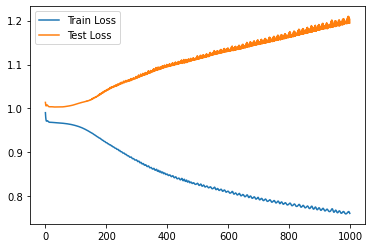

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


# Define the neural network architecture
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(4, 64)
        # Set weight for connections from A to the first hidden layer
        self.fc1.weight.data[:, 0] = abs(self.fc1.weight.data[:, 1])
        # Set weight for connections from C to the first hidden layer
        self.fc1.weight.data[:, 3] = abs(self.fc1.weight.data[:, 3])
        # Set weight for connections from B to the first hidden layer
        self.fc1.weight.data[:, 1] = abs(self.fc1.weight.data[:, 1]) * (-1)
        # Set weight for connections from C to the first hidden layer
        self.fc1.weight.data[:, 2] = abs(self.fc1.weight.data[:, 2]) * (-1)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, A, B, C, D):
        x = torch.cat((A, B, C, D), dim=1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x


# Generate some dummy input and output data for testing
A_train = torch.randn(10000, 1)
B_train = torch.randn(10000, 1)
C_train = torch.randn(10000, 1)
D_train = torch.randn(10000, 1)
E_train = torch.randn(10000, 1)

A_test = torch.randn(1000, 1)
B_test = torch.randn(1000, 1)
C_test = torch.randn(1000, 1)
D_test = torch.randn(1000, 1)
E_test = torch.randn(1000, 1)


model = MyNet()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_losses = []
test_losses = []


for epoch in range(1000):
    # Train the model on the training data
    model.train()
    optimizer.zero_grad()
    outputs = model(A_train, B_train, C_train, D_train)
    train_loss = criterion(outputs, E_train)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Evaluate the model on the test data
    model.eval()
    with torch.no_grad():
        test_outputs = model(A_test, B_test, C_test, D_test)
        test_loss = criterion(test_outputs, E_test)
        test_losses.append(test_loss.item())

    # Print the loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss.item()}, Test Loss = {test_loss.item()}")

# Plot the training and test losses over time
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

